In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

This sample image was downloaded from https://apollomapping.com/, it have tons of metadata that I will explore in the near future

In [2]:
raster_data = rasterio.open('example.tif')

In [3]:
img = raster_data.read()
img.shape

(8, 4259, 4277)

In [4]:
img = np.swapaxes(img, 0, 2)
img = 255 * (img / np.max(img))

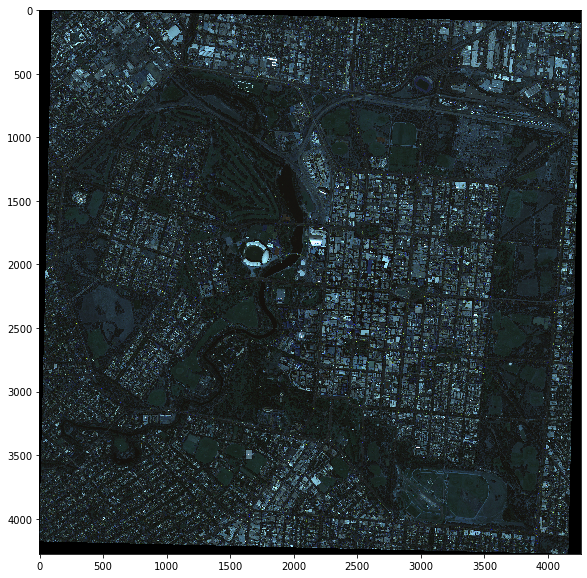

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,1:4].astype(np.int))

In [6]:
def image_histogram_equalisation(image):    
    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), 256, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (255-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)
    
    if len(image.shape) == 3:
        return image_equalized.reshape(image.shape).astype('uint8')[:,:,::-1]
    else:
        return image_equalized.reshape(image.shape).astype('uint8')

In [7]:
img_he = image_histogram_equalisation(img[:,:,1:4])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


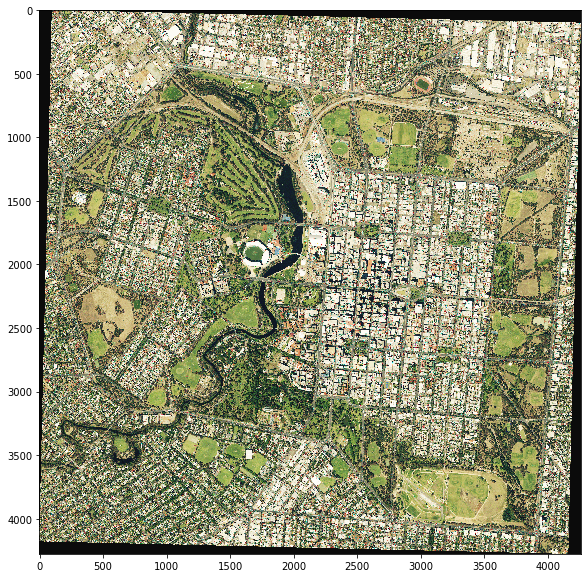

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(img_he)

In [9]:
def NDVI(reflectance_array):
    # be careful when calculating indices using the integer arrays
    # usually representing raster data. Explicitly convert to floats
    # for division.
    r = reflectance_array[:,:,4]
    ir = reflectance_array[:,:,-1]
    return (ir-r)/(ir+r)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


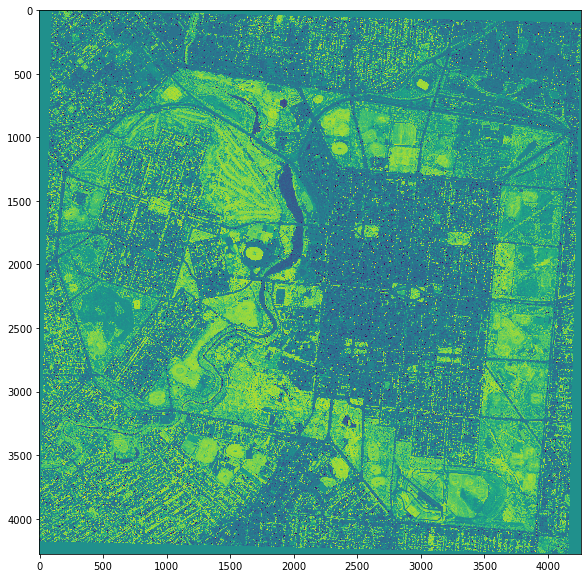

In [10]:
ndvi = NDVI(img)

ndvi[np.isnan(ndvi)] = 0

plt.figure(figsize=(10,10))
plt.imshow(ndvi)

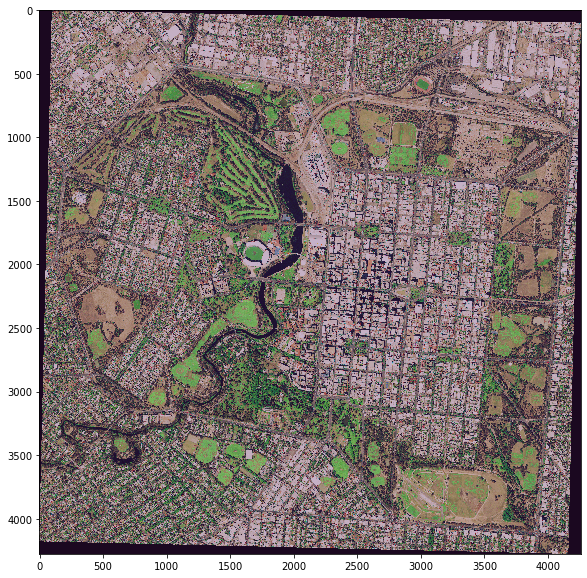

In [11]:
plt.figure(figsize=(10,10))
ndvi[ndvi < 0.6] = 0
plt.imshow(img_he)
plt.imshow(ndvi, alpha=0.3)

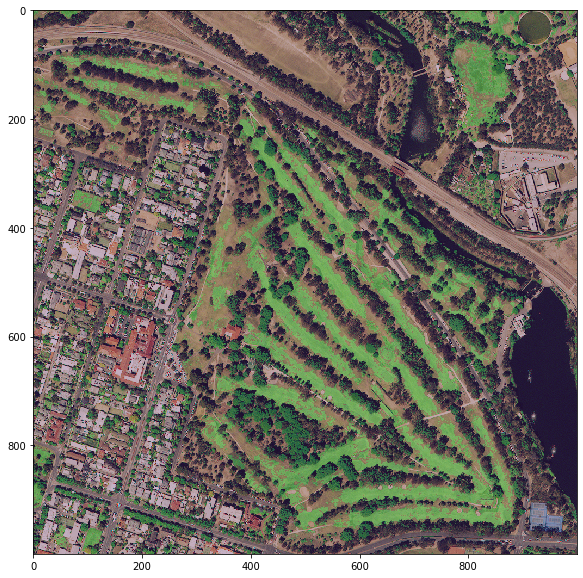

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(img_he[700:1700,1000:2000,:])
plt.imshow(ndvi[700:1700,1000:2000], alpha=0.3)

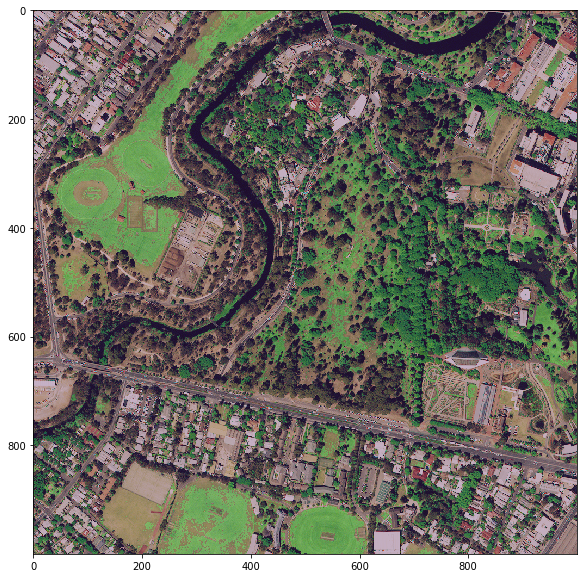

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(img_he[2500:3500,1000:2000,:])
plt.imshow(ndvi[2500:3500,1000:2000], alpha=0.3)